# Machine Learning - DSIT UOA

*** Assignment 1 ***

<u>**Contributors:**</u> Christina Borovilou, Ilias Stylianos Karampasis, Anastasia Rempoulaki

General comments regarding the below deliverables:

- Each question can be run independently and all code regarding its solution has been grouped in a collapsible heading for better and easier observation. *Extensions for jupyter notebooks must be installed and then enabling of collapsible heading if you want to use this functionalilty. See more here: https://jupyter-contrib-nbextensions.readthedocs.io/en/latest/install.html*
- We distributed the work for each problem. So although everyone in the team has knowledge of the solution for every individual question, we are going to observe diffent coding styles and perhaps level of details in commenting.

## Problem 1

### 1.1

In [13]:
# importing the required module 
import matplotlib.pyplot as plt 
import numpy as np
import math

Function to generate our **Input** & **"Experimental"** Results in arrays

In [14]:
def y_actual_res(th0, th1, th2, th3, th5, r_step, r__start, r__end):

    x = np.linspace(r_start, r_end, num= N)     #includes 2 in range [0,2]
    noise = np.random.normal(mu,math.sqrt(variance), size=(20,)) 
    y = th5*x**5 + th3*x**3 + th2*x**2 + th1*x + th0 + noise
    y_true = th5*x**5 + th3*x**3 + th2*x**2 + th1*x + th0

    return(x, y, y_true)

Actual polynomial model parameters and Sample range

In [15]:
th0 = 0.2
th1 = -1
th2 = 0.9
th3 = 0.7
th5 = -0.2

mu, variance = 0, 0.1 # mean and standard deviation
noise = np.random.normal(mu,math.sqrt(variance), [20,])

#data range
r_start = 0
r_end = 2
N  = 20
step = (r_end - r_start) / N


Using the function **y_actual_res** 

In [16]:
x, y, y_true = y_actual_res(th0, th1, th2, th3, th5, step, r_start, r_end)

Plotting the Experiments input

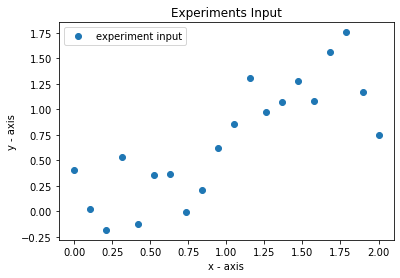

In [17]:
# plotting the points 
plt.plot(x, y, marker='o',linewidth=0, label = 'experiment input', ) 

# naming the x axis 
plt.xlabel('x - axis') 
# naming the y axis 
plt.ylabel('y - axis') 

# giving a title to my graph 
plt.title('Experiments Input') 

# function to show the plot 
plt.legend()
plt.show() 

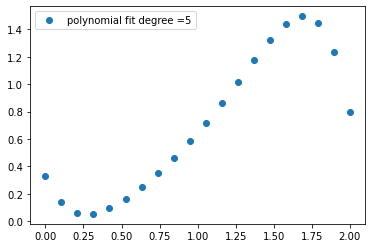

In [18]:
poly_deg = 5

Q_train = np.zeros(shape = (N,poly_deg+1))
Q_train[:,0] = 1

for i in range(1,poly_deg+1):
    Q_train[:,i] = np.power(x,i).reshape((N,))


#theta = ((X.T * X)^-1) * Χ.Τ * Υ
theta = np.linalg.pinv(Q_train.T.dot(Q_train)).dot(Q_train.T).dot(y)


plt.plot(x,Q_train.dot(theta), marker='o',linewidth=0, label='polynomial fit degree =' + str(poly_deg))
plt.legend()
plt.show()



Calculation of **MSE (Mean Square Error)** of y over the training set.

In [19]:
y_act = y_true
y_pred = Q_train.dot(theta)
summation = 0  #variable to store the summation of differences
n = len(y_act) #finding total number of items in list
for i in range(len(y_act)):  #looping through each element of the list
    difference = y_act[i] - y_pred[i]  #finding the difference between observed and predicted value
    squared_difference = pow(difference,2)  #taking square of the differene 
    summation = summation + squared_difference  #taking a sum of all the differences
MSE = summation/n  #dividing summation by total values to obtain average
print ("The Mean Square Error is: " , MSE)

The Mean Square Error is:  0.0214835109349052


### 1.2

In [9]:
#  Problem 1 - ii - Least Squares Regression

# importing the required modules 
import matplotlib.pyplot as plt 
import numpy as np
import math

Below you can see a function to acquire the **y train data** for a <u>N size input vector</u> from a given $5^{th}$ degree polynomial with *random i.i.d. noise samples* originating from a Gaussian distribution added for each point.

In [10]:
def get_y_train(t0, t1, t2, t3, t4, t5, mean, variance, N, x_input):

    noise = np.random.normal(mean,math.sqrt(variance), size=(N,)) # An N-size vector of random gaussian noise samples with mean value equal to "mean" variable and variance equal to "variance" variable
    y = t5*x_input**5 + t4*x_input**4 + t3*x_input**3 + t2*x_input**2 + t1*x_input + t0 + noise # The N-size vector of our y_train data

    return (y)

Below you can see a function to acquire the **y estimates** given x and y train data, the degree of the polynomial model and the size of train data vectors.

In [11]:
def get_y_est(poly_deg, x_train, y_train, N):

    Phi = np.zeros(shape = (N,poly_deg+1)) # initialize the Phi matrix with the correspondent dimensions as determined by theory
    Phi[:, -1] = 1 # the last column (corrensponding to the fixed term of the polynomian) is set to have 1 as value for all rows

    for i in range(0,poly_deg):
        Phi[:,i] = np.power(x_train,i+1) # calculating the rest values for Phi matrix as powers of the x_train vector

    # calculating the estimates for the thetas according to the theory type for Least Squared method for Generalized Linear Regression (white gaussian noise)
    theta = np.linalg.pinv(Phi.T.dot(Phi)).dot(Phi.T).dot(y_train) 
    y_est = Phi.dot(theta) # calculating y estimates
    return (y_est)

The below function calculates the **mean** and **variance** for each point for *exp_num experiments* (noise in train data is variable) and then **plots them along with the curve corresponding to the true model**.

In [20]:
def plot_pol_est_result(pol_deg, N, x_t, exp_num, t0, t1, t2, t3, t4, t5, mean, variance):
    experiments = [] # list gathering the results for each experiment
    for i in range(0,exp_num):
        y_train = get_y_train(t0, t1, t2, t3, t4, t5, mean, variance, N, x_t) # acquire train data for each experiment

        experiments.append(get_y_est(pol_deg, x_t, y_train, N)) # append estimates for experiment

    ##### Expected Value calculation
    E_Y = np.zeros(N)
    for i in range(0, exp_num):
        E_Y = E_Y + experiments[i]

    E_Y = E_Y / exp_num

    print('Results for polynomial of degree: ', pol_deg, '\n')
    print('Mean values: \n')
    print(E_Y)
    print('\n')

    ##### Variance calculation 
    var_Y = np.zeros(N)
    for i in range(0, exp_num):
        var_Y = var_Y + (experiments[i] - E_Y)**2

    var_Y = var_Y / exp_num

    print('Variance values: \n')
    print(var_Y)
    print('\n')

    #### True model calculation
    x_true = np.linspace(0, 2, 100) # to simulate continuity we increase the number of points
    y_true = t5*x_true**5 + t3*x_true**3 + t2*x_true**2 + t1*x_true + t0 # true model has no noise added

    plt.plot(x_true, y_true, '-g', label= 'true_model')

    plt.errorbar(x_t, E_Y, marker='o', markersize='2', linewidth=0, yerr= var_Y, elinewidth = 1, capsize = 5, label='polynomial LS regression degree: ' + str(pol_deg))

    # naming the x axis 
    plt.xlabel('x - axis') 
    # naming the y axis 
    plt.ylabel('y - axis') 

    # giving a title to my graph 
    plt.title('True model vs Polynomial Least Squares Regression') 

    # function to show the plot 
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

    plt.show()

Below we utilize the above defined fucntions to run the experiments **at first for a $2^{nd}$ degree** polynomial and **then for a $10^{th}$ degree** one.

Results for polynomial of degree:  2 

Mean values: 

[-0.15136918 -0.06746876  0.01799705  0.10502822  0.19362477  0.28378669
  0.37551399  0.46880666  0.56366471  0.66008813  0.75807692  0.85763109
  0.95875063  1.06143554  1.16568583  1.2715015   1.37888254  1.48782895
  1.59834073  1.71041789]


Variance values: 

[0.03518854 0.02344888 0.01586219 0.01142394 0.00925449 0.00859908
 0.00882781 0.00943567 0.01004252 0.01039309 0.01035699 0.00992871
 0.0092276  0.00849789 0.00810871 0.00855403 0.01045272 0.0145485
 0.02171    0.03293069]




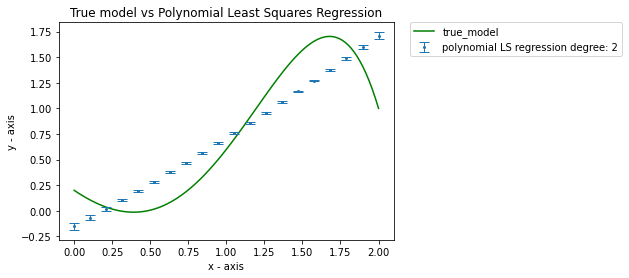



Results for polynomial of degree:  10 

Mean values: 

[ 0.15506288  0.12921072  0.05481695 -0.00560903 -0.02531625  0.00240439
  0.07509182  0.18732012  0.33339757  0.50795022  0.70550442  0.91964228
  1.14174358  1.35899006  1.55143726  1.68879814  1.72937558  1.62657035
  1.35282153  0.95695015]


Variance values: 

[0.11364334 0.08878189 0.05376866 0.04870217 0.03764748 0.04322207
 0.03803879 0.03038571 0.03879135 0.0396701  0.02911668 0.02845046
 0.03103156 0.03240457 0.0450276  0.04757283 0.04468442 0.04989404
 0.09338323 0.11712934]




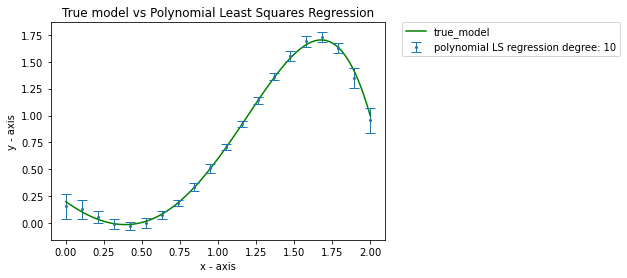

In [21]:
# polynomial factors of true model used in experiments
th0 = 0.2
th1 = -1
th2 = 0.9
th3 = 0.7
th5 = -0.2

# data range
r_start, r_end = 0, 2
# number of points
points_number  = 20
# number of experiments
experiments_number = 100
# mean, variance values for Gaussian noise
noise_mean, noise_variance = 0, 0.1
# take "points_number" equidistant points in [r_start, r_end]
x_train = np.linspace(r_start, r_end, num= points_number)

# run experiments for 2nd degree polynomial
plot_pol_est_result(2, points_number, x_train, experiments_number, th0, th1, th2, th3, 0, th5, noise_mean, noise_variance)
print('\n')
# run experiments for 10th degree polynomial
plot_pol_est_result(10, points_number, x_train, experiments_number, th0, th1, th2, th3, 0, th5, noise_mean, noise_variance)

<u>**Conclusions:**</u>

As expected, the **$2^{nd}$ degree** polynomial <u>does not produce a good estimate</u> of the true model which is of **$5^{th}$ degree**. On the other hand, the **$10^{th}$ degree** polynomial <u>fits much better (maybe even overfits)</u> the true model. However, we have to mention that **the variance** of y points is <u>much greater in the second case</u>.

**This is justified by the bias-variance dilemma**: *For <u>a fixed number</u> of train points (in our case 20), as the complexity of the estimator is increased the bias becomes smaller, but the variance of the estimates become higher because there are more free parameters to estimate between changing train set*.

So for the $2^{nd}$ degree polynomial we have high bias, but generally small variance and for the $10^{th}$ degree polynomial we succeed in minimizing bias, but with the cost of much higher variance for our estimates. **In order to avoid this and minimize both terms, we need to gradually and carefully increase the number of train points and the complexity of the model.**

### 1.3

### 1.4

In [22]:
#  Assignment 1 - iv - Full Bayesian Regression (θο equal to true parameter vector)

# importing the required module 
import matplotlib.pyplot as plt 
import numpy as np
import random
import math

We implement the function **get_y_train** in order to calculate the values of y.

In [23]:
def get_y_train(t0, t1, t2, t3, t4, t5, mu, variance, N, x):

    noise = np.random.normal(mu,math.sqrt(variance), size=(N,))
    y = t5*x**5 + t4*x**4 + t3*x**3 + t2*x**2 + t1*x + t0 + noise

    return (y)

We use the true parameter vector as the mean $θ_{0}$. We also get 20 random test points in [0, 2] interval.

In [25]:
th = [-1, 0.9, 0.7, 0, -0.2, 0.2]
random.seed()
x_random = np.array([])
for i in range(0, 20):
    x_random = np.append(x_random, [random.random()*2])

i) 1st case:
   Ν = 20 , $σ_{η}^{2}$ = 0.05, $σ_{θ}^{2}$ = 0.1 

We assign the values which are necessary for this case on the variables sigma_h, N, sigma_theta.

In [26]:
sigma_h = 0.05
N = 20
sigma_theta = 0.1


The true model structure is used in order to construct the **matrix Phi**.

In [27]:
x_train = np.linspace(0, 2, num= N)
y_train = get_y_train(th[5], th[0], th[1], th[2], th[3], th[4], 0, sigma_h, N, x_train)

pol_degree = 5

Phi = np.zeros(shape = (N,(pol_degree + 1))) # 6 = polynomial degree + 1
Phi[:, -1] = 1

phi_x_random = [] # this is going to be used for calculating y estimates for the random points
for i in range(0,5):
    phi_x_random.append(np.power(x_random,i+1)*th[i])
    Phi[:,i] = np.power(x_train,i+1)*th[i]

phi_x_random.append(np.array([1]*x_random.shape[0]))




We calculate the predicted values of y and we plot them corresponding to the input value x (blue points of the diagram).

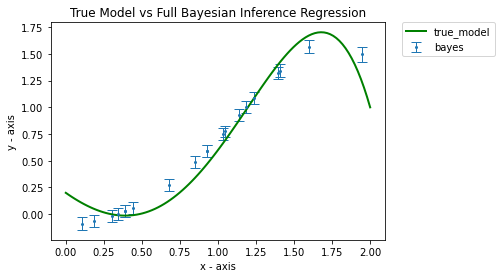

In [28]:
est_th_y = th + 1 / sigma_h * np.linalg.inv(1 / sigma_theta * np.eye(6) + 1 / sigma_h * Phi.T.dot(Phi)).dot(Phi.T).dot(y_train - Phi.dot(th))

# print('μ_θ_y:')
# print(est_th_y)
# print('\n')
phi_x_random = np.array(phi_x_random)

est_y = phi_x_random.T.dot(est_th_y)

sigma_y = sigma_h + sigma_h * sigma_theta * phi_x_random.T.dot(np.linalg.inv(sigma_h * np.eye(6) + sigma_theta * Phi.T.dot(Phi))).dot(phi_x_random) # variance - covariance matrix
y_var = sigma_y.diagonal()

x_true = np.linspace(0, 2, 100)
y_true = th[4]*x_true**5 + th[2]*x_true**3 + th[1]*x_true**2 + th[0]*x_true + th[5]

plt.errorbar(x_random, est_y, marker= 'o', markersize=2, linewidth=0, yerr= y_var, elinewidth = 1, capsize = 5, label='bayes')
plt.plot(x_true, y_true, '-g', linewidth=2, label= 'true_model')

# naming the x axis 
plt.xlabel('x - axis') 
# naming the y axis 
plt.ylabel('y - axis') 

# giving a title to my graph 
plt.title('True Model vs Full Bayesian Inference Regression') 

# function to show the plot 
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

ii) 2nd case:
Ν = 20 , $σ_{η}^{2}$ = 0.05, $σ_{θ}^{2}$ = 0.1 

We assign the values which are necessary for this case on the variables sigma_h, N, sigma_theta. The same random points are going to be used in order to extract useful and meaningful conclusions.

In [29]:
sigma_h = 0.15
N = 20
sigma_theta = 0.1

The true model structure is used in order to construct the **matrix Phi**.

In [30]:
x_train = np.linspace(0, 2, num= N)
y_train = get_y_train(th[5], th[0], th[1], th[2], th[3], th[4], 0, sigma_h, N, x_train)

pol_degree = 5
Phi = np.zeros(shape = (N,(pol_degree + 1))) # 6 = polynomial degree + 1
Phi[:, -1] = 1

phi_x_random = [] # in fact the calculation of phi_x_random could have been avoided, since the paremeters it's depending on did not change, but we recalculate it here for independence of experiments
for i in range(0,5):
    phi_x_random.append(np.power(x_random,i+1)*th[i])
    Phi[:,i] = np.power(x_train,i+1)*th[i]

phi_x_random.append(np.array([1]*x_random.shape[0]))

We calculate the predicted values of y and we plot them corresponding to the input value x (blue points of the diagram).

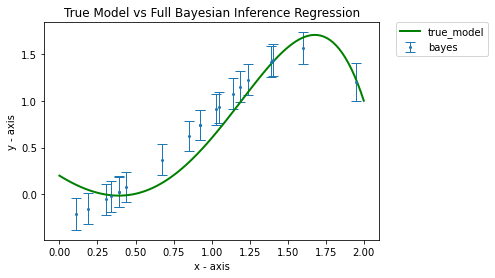

In [31]:
est_th_y = th + 1 / sigma_h * np.linalg.inv(1 / sigma_theta * np.eye(6) + 1 / sigma_h * Phi.T.dot(Phi)).dot(Phi.T).dot(y_train - Phi.dot(th))

# print('μ_θ_y:')
# print(est_th_y)
# print('\n')
phi_x_random = np.array(phi_x_random)

est_y = phi_x_random.T.dot(est_th_y)

# print('μ_y:')
# print(est_y)
# print('\n')

sigma_y = sigma_h + sigma_h * sigma_theta * phi_x_random.T.dot(np.linalg.inv(sigma_h * np.eye(6) + sigma_theta * Phi.T.dot(Phi))).dot(phi_x_random) # variance - covariance matrix
y_var = sigma_y.diagonal()

x_true = np.linspace(0, 2, 100)
y_true = th[4]*x_true**5 + th[2]*x_true**3 + th[1]*x_true**2 + th[0]*x_true + th[5]

plt.errorbar(x_random, est_y, marker= 'o', markersize=2, linewidth=0, yerr= y_var, elinewidth = 1, capsize = 5, label='bayes')
plt.plot(x_true, y_true, '-g', linewidth=2, label= 'true_model')

# naming the x axis 
plt.xlabel('x - axis') 
# naming the y axis 
plt.ylabel('y - axis') 

# giving a title to my graph 
plt.title('True Model vs Full Bayesian Inference Regression') 

# function to show the plot 
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

As it is clear the value of N = 20 is large enough in order to have the best predictions. Moreover, we can observe that the larger the noise variance is, the larger the error bars (the variance of estimations/predictions) become.

### 1.5

In [32]:
#  Problem 1 - v - Full Bayesian Regression (mean vector θο not equal to true parameter vector)

# importing the required module 
import matplotlib.pyplot as plt 
import numpy as np
import random
import math

Below you can see a function to acquire the **y train data** for a <u>N size input vector</u> from a given $5^{th}$ degree polynomial with *random i.i.d. noise samples* originating from a Gaussian distribution added for each point.

In [33]:
def get_y_train(t0, t1, t2, t3, t4, t5, mu, variance, N, x):

    noise = np.random.normal(mu,math.sqrt(variance), size=(N,)) # An N-size vector of random gaussian noise samples with mean value equal to "mean" variable and variance equal to "variance" variable
    y = t5*x**5 + t4*x**4 + t3*x**3 + t2*x**2 + t1*x + t0 + noise # The N-size vector of our y_train data

    return (y)

Below you can see a function that **implements full bayesian inference** for *N training points* and with *variance sigma_theta for the Gaussian function of the prior*. The **mean vector $θ_{0}$** is <u>following the correct model as for the polynomial degree but with different values from the true model</u>. Finally a plot of the estimates and their errors for the points in the x_random vector is drawn.

In [34]:
def bayesian_inference(N, sigma_theta, x_random):

    x_train = np.linspace(0, 2, num= N) # get N equidistant point in [0, 2] inverval
    th = [-1, 0.9, 0.7, 0, -0.2, 0.2]  # true paremeter vector
    theta_zero = np.array([-10.54, 0.465, 0.0087, 0, -0.093, -0.004]) # get the array from a list of values for mean θ0 vector
    sigma_h = 0.05 # variance of the noise gaussian model

    y_train = get_y_train(th[5], th[0], th[1], th[2], th[3], th[4], 0, sigma_h, N, x_train) # get the y train data for the given input and parameters

    Phi = np.zeros(shape = (N,6)) # 6 = polynomial degree + 1
    Phi[:, -1] = 1 # last column, all rows equal to 1 for the fixed term of θ_0

    phi_x_random = [] # this is going to be used for calculating y estimates for the random points
    for i in range(0,5):
        phi_x_random.append(np.power(x_random,i+1)*theta_zero[i]) # φ(x) matrix calculation (actually φ(x) is a vector but here is a matrix because we compute its values for all points in x_random vector)
        Phi[:,i] = np.power(x_train,i+1)*theta_zero[i] # Φ calculation

    phi_x_random.append(np.array([1]*x_random.shape[0])) # append a vector of ones as last element, according to theory

    est_th_y = theta_zero + 1 / sigma_h * np.linalg.inv(1 / sigma_theta * np.eye(6) + 1 / sigma_h * Phi.T.dot(Phi)).dot(Phi.T).dot(y_train - Phi.dot(theta_zero)) # calculation of estimates for θ vector for the given y train data

    # print('μ_θ_y:')
    # print(est_th_y)
    # print('\n')
    phi_x_random = np.array(phi_x_random) # turn the list into an array

    est_y = phi_x_random.T.dot(est_th_y) # calculation of the estimates of the model full bayesian inference produce, for the points in x_random vector

    # print('μ_y:')
    # print(est_y)
    # print('\n')

    sigma_y = sigma_h + sigma_h * sigma_theta * phi_x_random.T.dot(np.linalg.inv(sigma_h * np.eye(6) + sigma_theta * Phi.T.dot(Phi))).dot(phi_x_random) # calculation of errors/variances for the estimates (variance - covariance matrix)
    y_var = sigma_y.diagonal() # we keep only the elements of the diagonal of the covariance matrix which correspond to the variances we are interested in 

    #### True model calculation
    x_true = np.linspace(0, 2, 100) # to simulate continuity we increase the number of points
    y_true = th[4]*x_true**5 + th[2]*x_true**3 + th[1]*x_true**2 + th[0]*x_true + th[5] # true model has no noise added

    plt.errorbar(x_random, est_y, marker= 'o', markersize=2, linewidth=0, yerr= y_var, elinewidth = 1, capsize = 5, label='full bayesian inference N: ' + str(N) + ', σ_θ: ' + str(sigma_theta))
    plt.plot(x_true, y_true, '-g', linewidth=1, label= 'true_model')

    # naming the x axis 
    plt.xlabel('x - axis') 
    # naming the y axis 
    plt.ylabel('y - axis') 

    # giving a title to my graph 
    plt.title('True Model vs Full Bayesian Inference Regression') 

    # function to show the plot 
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    plt.show()

We get **20 random points in [0, 2] interval** and use the same in each experiment for better and more meaningful comparisons and conclusions. Then we run the 4 seperate experiments.

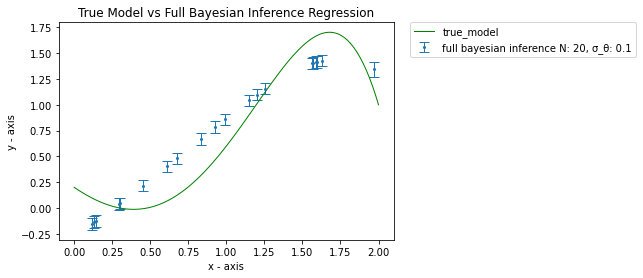

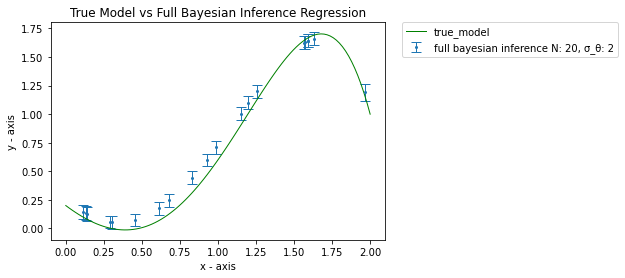

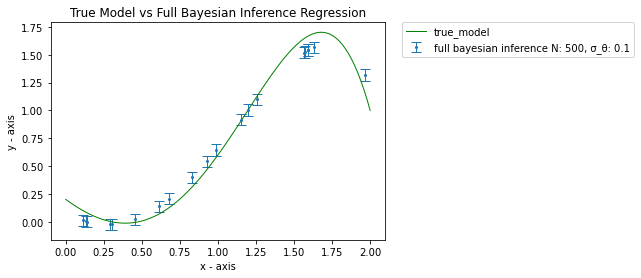

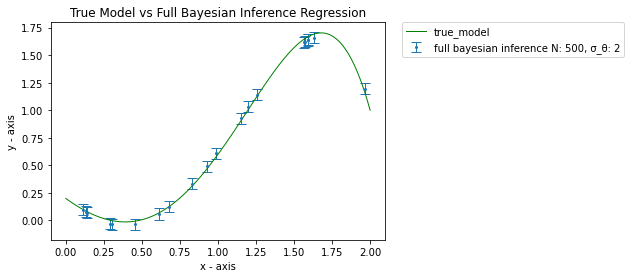

In [35]:
random.seed()
x_random = np.array([])
for i in range(0, 20):
    x_random = np.append(x_random, [random.random()*2]) # random.random() return random points in [0, 1] therefore we multiply with 2

bayesian_inference(20, 0.1, x_random) # N = 20, sigma_theta = 0.1
print('\n')
bayesian_inference(20, 2, x_random) # N = 20, sigma_theta = 2
print('\n')
bayesian_inference(500, 0.1, x_random) # N = 500, sigma_theta = 0.1
print('\n')
bayesian_inference(500, 2, x_random) # N = 500, sigma_theta = 2

<u>**Conclusions:**</u>

*The results we get for the above 4 experiments were the expected ones according to theory.*

The first safe comment that we can make is that <u>for a fixed number of points</u>, **as the variance (uncertainty) of the prior increases, we get better fit for**, <u>which is normal in our case</u>: we have adopted a model correct regarding the degree of the polynomial but **we are not certain about our initial estimates for $θ_{0}$** mean vector of the prior. Therefore **greater variance takes this into account and produces better predictions**.

Furthermore, **our estimates approximate/fit better the true model curve as the N increases while keeping constant the variance of the prior**. This is also justified, since <u>more training points is natural to give better results for our prediction even with small variance of the prior</u>.

In general as we **increase both the number of training points and the variance of the prior, we get better estimation of the true model**. <u>Also, we do not observe significant differences in the errors of the estimates</u>, although it seems to become a little smaller for greater N and slightly greater as $σ_{θ}$ increases (normal according to theory equation).

### 1.6

## Problem 2

**ATTENTION!**

<u>In order the code in below cells to work properly, the data set files should be in the same folder with the notebook, as we have provided them to you. Otherwise, you should change the path for the file read command.</u>

### 2.1

### 2.2

In [36]:
#  Problem 2 - ii - Probability Density Function calculation for different assumptions

# importing the required modules

import pandas as pd
import numpy as np
import math

df = pd.read_csv('pima-indians-diabetes.data', delimiter=',', encoding='ISO-8859–1', names=['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'Y'])

#### 2.2.a

#### 2.2.b

**Assumption:** "*Pdfs are gaussian, with non-diagonal covariance matrices. Means and covariance matrices of the pdfs are estimated using Maximum Likelihood from the available data.*"

In the next cell we calculate the mean and covariance matrix of the samples belonging in **diabetes class ('Y' = 1)** and then we use these values to calculate the estimation for the correspondent pdf, according to the below equation:

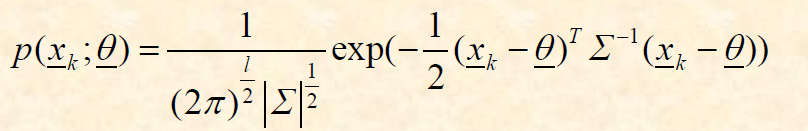

In [40]:
mean_diabetes = np.array([])
features = df.keys() # take the feature keys
features = features.drop('Y') # drop key corresponding to the class value
for key in features:
    # calculate the mean for each feature by summing all values and dividing with their number
    mean_diabetes = np.append(mean_diabetes, [df[key][df['Y'] == 1].sum()/len(df[key][df['Y'] == 1])])

print('means matrix for diabetes class\n')
print(mean_diabetes)
print('\n')

dimension = len(features) # dimensionality of the problem
covariance_diabetes = np.zeros(shape=(dimension, dimension)) # covariance matrix initialization
for i in range(0, dimension):
    for j in range(0, dimension):
        # calculate (co)variance for each element of the matrix, following the theory equation
        buffer = (df[features[i]][df['Y'] == 1] - mean_diabetes[i])*(df[features[j]][df['Y'] == 1] - mean_diabetes[j])
        covariance_diabetes[i][j] = buffer.sum()/len(buffer)

print('covariance matrix for diabetes class\n')
print(covariance_diabetes)
print('\n')

df_feat_only_diabetes = df.drop('Y', axis=1)[df['Y'] == 1] # get series without class feature, only for diabetes class
features_array_diabetes = df_feat_only_diabetes.to_numpy() # turn series to an array

# the below variables are just intermediate result for the pdf equation, in order to keep it readable
buffer_array = features_array_diabetes-mean_diabetes
deter_cov_diab = np.linalg.det(covariance_diabetes)
cov_diab_inv = np.linalg.inv(covariance_diabetes)

# apply the equation from theory to calculate the pdf estimates
pdf_diabetes = (1 / ( (2*math.pi)**(dimension/2) * (deter_cov_diab**(1/2)))) * np.exp((-1/2)*(buffer_array.dot(cov_diab_inv)).dot(buffer_array.T))

# because we introduce the whole matrix buffer_array in the equation and not point by point, we calculate more results,
# most of them not having actual meaning. Only the diagonal values are the actual pdfs.
# however we avoid using a for loop and use the matrix multiplication because it is optimized in python.
pdf_diabetes = pdf_diabetes.diagonal()
print('pdf estimation for diabetes class\n')
print(pdf_diabetes)
print('\n')

means matrix for diabetes class

[  4.86567164 141.25746269  70.82462687  22.1641791  100.3358209
  35.14253731   0.5505      37.06716418]


covariance matrix for diabetes class

[[ 1.39446425e+01 -6.49899755e+00  1.01704723e+01 -5.21675206e+00
  -4.06116061e+01 -4.30622633e+00 -9.60335821e-02  1.81918579e+01]
 [-6.49899755e+00  1.01633297e+03  4.69817192e+01  2.11629539e+01
   1.15345458e+03  1.16521079e+01  3.13677239e-01  3.44006182e+01]
 [ 1.01704723e+01  4.69817192e+01  4.60174468e+02  8.52675986e+01
   2.65379789e+02  2.08309674e+01  2.75236940e-01  6.16908833e+01]
 [-5.21675206e+00  2.11629539e+01  8.52675986e+01  3.11405881e+02
   1.11529561e+03  3.99210013e+01  1.79638806e+00 -1.77759523e+01]
 [-4.06116061e+01  1.15345458e+03  2.65379789e+02  1.11529561e+03
   1.91629021e+04  5.53069837e+01  5.22539925e+00  3.62871464e+01]
 [-4.30622633e+00  1.16521079e+01  2.08309674e+01  3.99210013e+01
   5.53069837e+01  5.25538622e+01  3.68475000e-01 -1.49215137e+01]
 [-9.60335821e-02  3.13

In the next cell we calculate the mean and covariance matrix of the samples belonging in **non diabetes class ('Y' = 0)** and then we use these values to calculate the estimation for the correspondent pdf.

In [42]:
mean_non_diabetes = np.array([])
# features array has already been computed in above cell
for key in features:
    # calculate the mean for each feature by summing all values and dividing with their number
    mean_non_diabetes = np.append(mean_non_diabetes, [df[key][df['Y'] == 0].sum()/len(df[key][df['Y'] == 0])])

print('means matrix for non diabetes class\n')
print(mean_non_diabetes)
print('\n')

covariance_non_diabetes = np.zeros(shape=(dimension, dimension)) # covariance matrix initialization
for i in range(0, dimension):
    for j in range(0, dimension):
        # calculate (co)variance for each element of the matrix, following the theory equation
        buffer = (df[features[i]][df['Y'] == 0] - mean_diabetes[i])*(df[features[j]][df['Y'] == 0] - mean_diabetes[j])
        covariance_non_diabetes[i][j] = buffer.sum()/len(buffer)

print('covariance matrix for non diabetes class\n')
print(covariance_non_diabetes)
print('\n')

df_feat_only_non_diabetes = df.drop('Y', axis=1)[df['Y'] == 0] # get series without class feature, only for diabetes class
features_array_non_diabetes = df_feat_only_non_diabetes.to_numpy() # turn series to an array

# the below variables are just intermediate result for the pdf equation, in order to keep it readable
buffer_array = features_array_non_diabetes-mean_non_diabetes
deter_cov_non_diab = np.linalg.det(covariance_diabetes)
cov_non_diab_inv = np.linalg.inv(covariance_non_diabetes)

# apply the equation from theory to calculate the pdf estimates
pdf_non_diabetes = (1 / ( (2*math.pi)**(dimension/2) * (deter_cov_non_diab**(1/2)))) * np.exp((-1/2)*(buffer_array.dot(cov_non_diab_inv)).dot(buffer_array.T))

# as already has been stated, because we introduce the whole matrix buffer_array in the equation and not point by point, we calculate more results,
# most of them not having actual meaning. Only the diagonal values are the actual pdfs.
# however we avoid using a for loop and use the matrix multiplication because it is optimized in python.
pdf_non_diabetes = pdf_non_diabetes.diagonal()
print('pdf estimation for non diabetes class\n')
print(pdf_non_diabetes)
print('\n')

means matrix for non diabetes class

[  3.298    109.98      68.184     19.664     68.792     30.3042
   0.429734  31.19    ]


covariance matrix for non diabetes class

[[ 1.15427904e+01  5.68007513e+01  1.13788039e+01 -1.38641212e+00
   1.01583375e+01  7.96687260e+00  1.17318701e-01  2.93368436e+01]
 [ 5.68007513e+01  1.66027527e+03  1.73445788e+02  8.44205387e+01
   1.89698852e+03  1.77762399e+02  4.52279674e+00  2.53230583e+02]
 [ 1.13788039e+01  1.73445788e+02  3.32595054e+02  5.68158641e+01
   2.16297733e+02  6.31216707e+01  4.66042888e-01  6.06764376e+01]
 [-1.38641212e+00  8.44205387e+01  5.68158641e+01  2.27518000e+02
   6.85317314e+02  6.22173211e+01  7.24965254e-01 -1.37041969e+01]
 [ 1.01583375e+01  1.89698852e+03  2.16297733e+02  6.85317314e+02
   1.07498094e+04  3.45492319e+02  1.05195657e+01  1.35877342e+01]
 [ 7.96687260e+00  1.77762399e+02  6.31216707e+01  6.22173211e+01
   3.45492319e+02  8.24251103e+01  7.46504161e-01  3.16655047e+01]
 [ 1.17318701e-01  4.52279674e+0

<u>**Goodness of fit measument**</u>

In order to calculate **AIC and BIC criterion** values for each class, we calculate firstly log-likelihood L(θ). For the assumption used for pdfs *k* (the number of estimated parameters for our model) is 44 => <u>8 values for means for each $X_{i}$ + 8*(8+1)/2 values because the covariance matrix is symmetric so we have half table plus diagonal</u>. Finally, regarding AIC the **equation for small sample size** is used, since N/k is less than 40.

In [48]:
## k = 8 values for means for each Xi + 8x(8+1)/2 values because the covariance matrix is symmetric so we have half table plus diagonal
k = 8 + 8*9/2
N_diabetes = len(features_array_diabetes[:,0])
N_non_diabetes = len(features_array_non_diabetes[:,0])

diabetes_loglikelihood = np.log(pdf_diabetes).sum()
AIC_diabetes = -2*diabetes_loglikelihood + 2 * k + (2*k+1) / (N_diabetes-k-1)
BIC_diabetes = -2*diabetes_loglikelihood + k * math.log(N_diabetes)
print('AIC_diabetes: ', AIC_diabetes)
print('BIC_diabetes: ', BIC_diabetes)

non_diabetes_loglikelihood = np.log(pdf_non_diabetes).sum()
AIC_non_diabetes = -2*non_diabetes_loglikelihood + 2 * k + (2*k+1) / (N_non_diabetes-k-1)
BIC_non_diabetes = -2*non_diabetes_loglikelihood + k * math.log(N_non_diabetes)
print('AIC_non_diabetes: ', AIC_non_diabetes)
print('BIC_non_diabetes: ', BIC_non_diabetes)

AIC_diabetes:  16112.262993994169
BIC_diabetes:  16269.867317997632
AIC_non_diabetes:  29646.07403418648
BIC_non_diabetes:  29831.32118612145


#### 2.2.c

#### 2.2.d

**Assumption:** "*Components of the feature vectors are mutually statistically independent (the usual naïve Bayes approach). Marginal pdfs are computed using 1-d Parzen windows with gaussian kernels. Take the width h of each window equal to the square root of the number of patterns in the available data.*"

In the next cell we calculate **the marginal pdf for each feature** of the samples belonging in **diabetes class ('Y' = 1)** and then we calculate the estimation for the correspondent pdf as the product of the marginal pdfs (naive bayes approach).

For the computation of the marginal pdfs we use <u>1-d Parzen windows with gaussian kernels, which have standard deviation equal to the width *h* of the window and mean value each sample point</u>, according to the below equation (we replace σ with h):

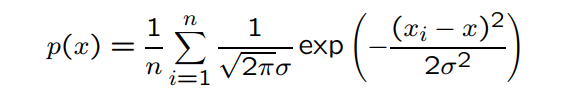

In [53]:
N_diabetes = len(features_array_diabetes[:,0]) # number of samples
h_diabetes = math.sqrt(N_diabetes) # set the window width equal to the square root of number of samples for class

marginal_pdfs_diab = []
for i in range(0, dimension):
    buffer = np.zeros(N_diabetes)
    for xi in features_array_diabetes[:][i]:
        # the below buffer is used for summation of the gaussians (equation from theory)
        buffer = buffer + (1 / (math.sqrt(2*math.pi)*h_diabetes)) * np.exp((-1 / (2*(h_diabetes**2)))*(features_array_diabetes[:,i] - xi)**2)
    buffer = buffer / N_diabetes
    marginal_pdfs_diab.append(buffer)

pdf_diabetes_parzen = np.ones(marginal_pdfs_diab[0].shape) # initialization for pdf calculation
for marg_pdf in marginal_pdfs_diab:
    pdf_diabetes_parzen = pdf_diabetes_parzen * marg_pdf # calculate product repeatedly

print('pdf estimation for diabetes class (naive bayes using parzen windows)\n')
print(pdf_diabetes_parzen)
print('\n')

pdf estimation for diabetes class (naive bayes using parzen windows)

[8.05891797e-032 2.55672952e-030 9.99621055e-033 1.39972642e-030
 2.91895610e-031 6.46922363e-034 2.60417538e-031 4.99241420e-105
 1.30300034e-031 2.97220713e-031 2.92278402e-035 1.82919295e-032
 1.21893517e-033 3.33230226e-032 1.56523240e-033 1.21806415e-035
 3.68019338e-035 2.51227941e-032 1.10859051e-033 3.28356548e-032
 3.01312104e-031 3.29254028e-033 3.88912110e-033 1.30376542e-030
 8.62269806e-032 7.77389383e-041 2.44955161e-040 5.56016113e-033
 1.06387573e-032 2.24000465e-033 4.05425912e-032 1.37319098e-034
 1.51286691e-032 3.94259604e-033 3.56125843e-034 1.01066257e-032
 2.34004346e-035 2.29673380e-031 2.71905001e-032 3.71768037e-034
 3.27004733e-033 3.35520800e-031 3.88043894e-033 1.17361005e-033
 1.15066598e-032 4.19343982e-033 1.91344858e-031 1.46071723e-036
 5.27662317e-033 9.49729293e-032 7.52290820e-033 1.45101302e-031
 3.06382414e-032 5.23560581e-034 2.04156642e-031 1.15901343e-032
 3.56964805e-033 4.7

In the next cell we calculate **the marginal pdf for each feature** of the samples belonging in **non diabetes class ('Y' = 0)** and then we calculate the estimation for the correspondent pdf as the product of the marginal pdfs (naive bayes approach).

For the computation of the marginal pdfs we use <u>1-d Parzen windows with gaussian kernels, which have standard deviation equal to the width *h* of the window and mean value each sample point</u>, according to the below equation (we replace σ with h):

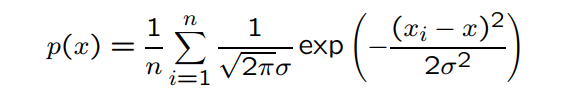

In [54]:
N_non_diabetes = len(features_array_non_diabetes[:,0]) # number of samples
h_non_diabetes = math.sqrt(N_non_diabetes) # set the window width equal to the square root of number of samples for class

marginal_pdfs_non_diab = []
for i in range(0, dimension):
    buffer = np.zeros(N_non_diabetes)
    for xi in features_array_non_diabetes[:][i]:
        # the below buffer is used for summation of the gaussians (equation from theory)
        buffer = buffer + (1 / (math.sqrt(2*math.pi)*h_non_diabetes)) * np.exp((-1 / (2*(h_non_diabetes**2)))*(features_array_non_diabetes[:,i] - xi)**2)
    buffer = buffer / N_non_diabetes
    marginal_pdfs_non_diab.append(buffer)

pdf_non_diabetes_parzen = np.ones(marginal_pdfs_non_diab[0].shape) # initialization for pdf calculation
for marg_pdf in marginal_pdfs_non_diab:
    pdf_non_diabetes_parzen = pdf_non_diabetes_parzen * marg_pdf # calculate product repeatedly

print('pdf estimation for non diabetes class (naive bayes using parzen windows)\n')
print(pdf_non_diabetes_parzen)
print('\n')

pdf estimation for non diabetes class (naive bayes using parzen windows)

[4.28635026e-032 1.83958724e-032 2.41788873e-032 7.49345020e-032
 2.27377836e-032 2.91041473e-033 1.47195836e-032 1.72694311e-040
 2.78096881e-032 5.66669348e-033 6.07005431e-034 1.66883250e-032
 1.34640912e-032 2.76012898e-032 5.35099451e-032 1.05433818e-032
 9.35446457e-036 4.25966498e-033 4.27867390e-036 5.27576199e-033
 2.85524240e-032 4.58336633e-034 2.51378199e-033 4.26534704e-032
 1.58871064e-031 1.47607722e-032 4.50570249e-032 5.08593088e-032
 5.33577106e-058 8.54562777e-032 2.00272195e-033 1.27941574e-033
 1.45642324e-033 2.11536604e-031 7.24069435e-032 6.56121640e-034
 3.45953550e-032 1.46844962e-032 3.78700261e-032 6.39646193e-034
 3.41595783e-034 1.25977812e-044 3.49609893e-032 1.10711204e-031
 4.14534694e-032 2.76625391e-032 2.84582737e-032 5.39679615e-032
 2.09512540e-031 1.26555222e-032 3.62647730e-032 5.21844123e-033
 7.81373357e-033 9.14261638e-033 3.40472089e-032 7.78916982e-032
 3.91416957e-035

<u>**Goodness of fit measument**</u>

In order to calculate **AIC and BIC criterion** values for each class, we calculate firstly log-likelihood L(θ). For the assumption used for pdfs *k* (the number of estimated parameters for our model) is 1 => <u>the only parameter we can affect is *h* which is the same for every $X_{i}$</u>. Finally, regarding AIC the **general equation** is used, since N/k is more than 40.

In [55]:
## k = 1 because the only parameter is h which is the same for every Xi
k_parzen = 1
N_diabetes = len(features_array_diabetes[:,0])
N_non_diabetes = len(features_array_non_diabetes[:,0])

diabetes_loglikelihood_parzen = np.log(pdf_diabetes_parzen).sum()
AIC_parzen_diabetes = -2*diabetes_loglikelihood_parzen + 2 * k_parzen
BIC_parzen_diabetes = -2*diabetes_loglikelihood_parzen + k_parzen * math.log(N_diabetes)
print('AIC_parzen_diabetes: ', AIC_parzen_diabetes)
print('BIC_parzen_diabetes: ', BIC_parzen_diabetes)

non_diabetes_loglikelihood_parzen = np.log(pdf_non_diabetes_parzen).sum()
AIC_parzen_non_diabetes = -2*non_diabetes_loglikelihood_parzen + 2 * k_parzen 
BIC_parzen_non_diabetes = -2*non_diabetes_loglikelihood_parzen + k_parzen * math.log(N_non_diabetes)
print('AIC_parzen_non_diabetes: ', AIC_parzen_non_diabetes)
print('BIC_parzen_non_diabetes: ', BIC_parzen_non_diabetes)

AIC_parzen_diabetes:  40719.700721292844
BIC_parzen_diabetes:  40723.291708273355
AIC_parzen_non_diabetes:  78998.97309879342
BIC_parzen_non_diabetes:  79003.18770689184


### 2.3

In [56]:
#  Problem 2 - iii - Bayesian classification utilizing the estimated pdfs from 2ii

# importing the required modules

import pandas as pd
import numpy as np
import math

df = pd.read_csv('pima-indians-diabetes.data', delimiter=',', encoding='ISO-8859–1', names=['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'Y'])

#### 2.3.a

#### 2.3.b

**Assumption:** "*Pdfs are gaussian, with non-diagonal covariance matrices. Means and covariance matrices of the pdfs are estimated using Maximum Likelihood from the available data.*"

Below we define helper functions we are going to use to implement the Bayes Classifier for the above assumption for class pdfs. *We are explaining only any new notions added to the code from question 2.ii since in general it's the same, just grouped for reusability reasons.*

In [64]:
# this function calculates the mean for a given dataframe
# class_feature is the key corresponding to the class
# class_value is the value corresponding to the class whose mean we are calculating
def calculate_mean_for_class(dataframe, class_feature, class_value):
    mean = np.array([])
    features = dataframe.keys()
    features = features.drop(class_feature)
    for key in features:
        mean = np.append(mean, [dataframe[key][df[class_feature] == class_value].sum()/len(df[key][df[class_feature] == class_value])])
    return mean

# this function calculates the covariance matrix for a given dataframe
# class_mean is the means matrix for the class
# class_feature is the key corresponding to the class
# class_value is the value corresponding to the class whose mean we are calculating
def calculate_covariance_matrix_for_class(dataframe, class_mean, class_feature, class_value):
    features = dataframe.keys()
    features = features.drop(class_feature)
    dimension = len(features)
    covariance = np.zeros(shape=(dimension, dimension))
    for i in range(0, dimension):
        for j in range(0, dimension):
            buffer = (df[features[i]][df[class_feature] == class_value] - class_mean[i])*(df[features[j]][df[class_feature] == class_value] - class_mean[j])
            covariance[i][j] = buffer.sum()/len(buffer)

    return covariance

# this function calculates pdf for a given test set x
# mean is the means matrix of the train data
# covariance is the covariance matrix of the train data
def calculate_pdf_for_test_set(x, mean, covariance):
    deter_covariance = np.linalg.det(covariance)
    covariance_inv = np.linalg.inv(covariance)
    dimension = len(mean)
    pdf_x = (1 / ( (2*math.pi)**(dimension/2) * (deter_covariance**(1/2)))) * np.exp((-1/2)*((x.to_numpy()-mean).dot(covariance_inv)).dot((x.to_numpy()-mean).T))
    return pdf_x.diagonal()

# this function does the classification of the points in test set and calculates the accuracy
# prop_class0, prop_class1 are the probabilities for each sample in test set to be in class0 or class1 respectively
# test_set is the test series with the features and the actual class for each feature
# epoch is the repetition we are in the cross validation cycle
def classify_and_calculate_epoch_accuracy(prop_class0, prop_class1, test_set, epoch):
    classification = []
    for i in range(0, len(prop_class0)):
        # classification of each sample according to which probability is greater
        if prop_class0[i] > prop_class1[i]:
            classification.append(0)
        else:
            classification.append(1)
    # in order to count the accuracy we count the correct classifications
    # by comparing with actual class of each sample and finally divide with the test set size
    correct_classifications = 0
    for i in range(0, len(classification)):
        if classification[i] == test_set['Y'][epoch*len(classification)+i]:
            correct_classifications += 1
    accurracy_percentage = correct_classifications * 100 / len(classification) # we return % percentage
    return accurracy_percentage

# this function runs all the necessary steps to calculate the accuracy for a validation epoch
# train_set is our training set for this epoch
# test_set is our test set fot this epoch
# prop_non_diabetes, prop_diabetes are the propabilities for each class for the given dataset in total
# epoch is the repetition step in cross validation
def calculate_accuracy_for_validation_epoch(train_set, test_set, prop_non_diabetes, prop_diabetes, epoch):
    # calculate mean for non diabetes class
    mean_class_non_diabetes = calculate_mean_for_class(train_set, 'Y', 0)
    # calculate cov matrix for non diabetes class
    covariance_class_non_diabetes = calculate_covariance_matrix_for_class(train_set, mean_class_non_diabetes, 'Y', 0)
    # calculate mean for diabetes class
    mean_class_diabetes = calculate_mean_for_class(train_set, 'Y', 1)
    # calculate cov matrix for non diabetes class
    covariance_class_diabetes = calculate_covariance_matrix_for_class(train_set, mean_class_diabetes, 'Y', 1)
    # calculate pdf for test set for non diabetes class
    pdfs_test_set_class_non_diabetes = calculate_pdf_for_test_set(test_set.drop('Y', axis=1), mean_class_non_diabetes, covariance_class_non_diabetes)
    # calculate probabilities for each sample in test set to be in non diabetes class
    prop_class_non_diabetes_test_set = pdfs_test_set_class_non_diabetes*prop_non_diabetes
    # calculate pdf for test set for diabetes class
    pdfs_test_set_class_diabetes = calculate_pdf_for_test_set(test_set.drop('Y', axis=1), mean_class_diabetes, covariance_class_diabetes)
    # calculate probabilities for each sample in test set to be in diabetes class
    prop_class_diabetes_test_set = pdfs_test_set_class_diabetes*prop_diabetes
    # do the classification, the cross validation and return the accuracy for the current epoch
    return classify_and_calculate_epoch_accuracy(prop_class_non_diabetes_test_set, prop_class_diabetes_test_set, test_set, epoch)



Below we are utilizing the above defined functions to **perform 8-fold cross validation** for our data set

In [65]:
fold = 8
k = math.ceil(df.index.shape[0] / fold) # 8-Fold cross validation

# the probabibly of each class in our data set is by definition the number of samples belonging in the class
# devided by the size of the data set
class_non_diabetes_prop = df[df['Y'] == 0].shape[0] / df.index.shape[0]
class_diabete_prop = df[df['Y'] == 1].shape[0] / df.index.shape[0]

accurracy_percentages = []
for i in range(0, fold):
  accurracy_percentages.append(calculate_accuracy_for_validation_epoch(df.drop(df.index[i*k:(i+1)*k]), df[i*k:(i+1)*k], class_non_diabetes_prop, class_diabete_prop, i))

print('Accuracy percentages for each "epoch":\n')
print(accurracy_percentages)
print('\n')

average_accuracy = sum(accurracy_percentages) / len(accurracy_percentages)

print('Average accuracy for current pdf assumption:\n')
print(round(average_accuracy, 2), '%')
print('\n')

Accuracy percentages for each "epoch":

[72.91666666666667, 75.0, 72.91666666666667, 72.91666666666667, 76.04166666666667, 78.125, 76.04166666666667, 73.95833333333333]


Average accuracy for current pdf assumption:

74.74 %




#### 2.3.c

#### 2.3.d

**Assumption:** "*Components of the feature vectors are mutually statistically independent (the usual naïve Bayes approach). Marginal pdfs are computed using 1-d Parzen windows with gaussian kernels. Take the width h of each window equal to the square root of the number of patterns in the available data.*"

Below we define helper functions we are going to use to implement the Bayes Classifier for the above assumption for class pdfs. *We are explaining only any new notions added to the code from question 2.ii since in general it's the same, just grouped for reusability reasons.*

In [69]:
# this function calculates the pdf for the test set using 1-d parzen windows with gaussian kernels for the marginal pdfs
# it receives 2 arguments: the training and the test set in the form of pandas series
def calculate_pdf_parzen_for_test_set(x_train, x_test):
    x_train_array = x_train.to_numpy() # turn train series into array
    x_test_array = x_test.to_numpy() # turn test series into array
    N = x_train_array.shape[0] # size of training set
    h = math.sqrt(N) # set the window width equal to the square root of number of samples for class
    dimension = x_train_array.shape[1] # problem dimensionality
    
    # marginal pdfs calculation
    marginal_pdfs = []
    for i in range(0, dimension):
        buffer = np.zeros(x_test_array.shape[0])
        for xi in x_train_array[:][i]:
            buffer = buffer + (1 / (math.sqrt(2*math.pi)*h)) * np.exp((-1 / (2*(h**2)))*(x_test_array[:,i] - xi)**2)
        buffer = buffer / N
        marginal_pdfs.append(buffer)
    
    # pdf calculation as product of the marginal pdfs according to naive bayes approach
    pdf_parzen = np.ones(marginal_pdfs[0].shape)
    for marg_pdf in marginal_pdfs:
        pdf_parzen = pdf_parzen * marg_pdf
    return pdf_parzen

# this function does the classification of the points in test set and calculates the accuracy
# prop_class0, prop_class1 are the probabilities for each sample in test set to be in class0 or class1 respectively
# test_set is the test series with the features and the actual class for each feature
# epoch is the repetition we are in the cross validation cycle
def classify_and_calculate_epoch_accuracy(prop_class0, prop_class1, test_set, epoch):
    classification = []
    for i in range(0, len(prop_class0)):
        # classification of each sample according to which probability is greater
        if prop_class0[i] > prop_class1[i]:
            classification.append(0)
        else:
            classification.append(1)
    # in order to count the accuracy we count the correct classifications
    # by comparing with actual class of each sample and finally divide with the test set si
    correct_classifications = 0
    for i in range(0, len(classification)):
        if classification[i] == test_set['Y'][epoch*len(classification)+i]:
            correct_classifications += 1
    accurracy_percentage = correct_classifications * 100 / len(classification) # we return % percentage
    return accurracy_percentage

# this function runs all the necessary steps to calculate the accuracy for a validation epoch
# train_set is our training set for this epoch
# test_set is our test set fot this epoch
# prop_non_diabetes, prop_diabetes are the propabilities for each class for the given dataset in total
# epoch is the repetition step in cross validation
def calculate_accuracy_parzen_for_validation_epoch(train_set, test_set, prop_non_diabetes, prop_diabetes, epoch):
    # calculate pdf for test set for non diabetes class
    pdfs_parzen_test_set_class_non_diabetes = calculate_pdf_parzen_for_test_set(train_set[train_set['Y'] == 0].drop('Y', axis=1), test_set.drop('Y', axis=1))
    # calculate probabilities for each sample in test set to be in non diabetes class
    prop_class_non_diabetes_test_set = pdfs_parzen_test_set_class_non_diabetes*prop_non_diabetes
    # calculate pdf for test set for diabetes class
    pdfs_parzen_test_set_class_diabetes = calculate_pdf_parzen_for_test_set(train_set[train_set['Y'] == 1].drop('Y', axis=1), test_set.drop('Y', axis=1))
    # calculate probabilities for each sample in test set to be in diabetes class
    prop_class_diabetes_test_set = pdfs_parzen_test_set_class_diabetes*prop_diabetes
    # do the classification, the cross validation and return the accuracy for the current epoch
    return classify_and_calculate_epoch_accuracy(prop_class_non_diabetes_test_set, prop_class_diabetes_test_set, test_set, epoch)

Below we are utilizing the above defined functions to **perform 8-fold cross validation** for our data set

In [70]:
fold = 8
k = math.ceil(df.index.shape[0] / fold) # 8-Fold cross validation

# the probabibly of each class in our data set is by definition the number of samples belonging in the class
# devided by the size of the data set
class_non_diabetes_prop = df[df['Y'] == 0].shape[0] / df.index.shape[0]
class_diabete_prop = df[df['Y'] == 1].shape[0] / df.index.shape[0]

accurracy_percentages_parzen = []
for i in range(0, fold):
    accurracy_percentages_parzen.append(calculate_accuracy_parzen_for_validation_epoch(df.drop(df.index[i*k:(i+1)*k]), df[i*k:(i+1)*k], class_non_diabetes_prop, class_diabete_prop, i))

print('Accuracy percentages for each "epoch":\n')
print(accurracy_percentages_parzen)
print('\n')

average_accuracy_parzen = sum(accurracy_percentages_parzen) / len(accurracy_percentages_parzen)

print('Average accuracy for current pdf assumption:\n')
print(round(average_accuracy_parzen, 2), '%')
print('\n')

Accuracy percentages for each "epoch":

[36.458333333333336, 43.75, 55.208333333333336, 52.083333333333336, 51.041666666666664, 47.916666666666664, 53.125, 48.958333333333336]


Average accuracy for current pdf assumption:

48.57 %




<u>**Conclusions/Comments for 2.3:**</u>

### 2.4